# Deep Neural Networks
Welcome to Homework 2  &#128522;&#9996;

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras import Sequential

from tensorflow.keras.optimizers import Adam ,SGD,RMSprop,Adagrad 
from tensorflow.keras.losses import categorical_crossentropy



In [256]:
# from google.colab import files

# uploaded = files.upload()

KeyboardInterrupt: ignored

We will start by loading the packages:

Then, we load the dataset:

In [117]:
def load_data(file_name):
    npzfile = np.load(file_name)

    X_train = npzfile["inputs_train"].T / 255.0
    X_valid = npzfile["inputs_valid"].T / 255.0
    X_test = npzfile["inputs_test"].T / 255.0
    Y_train = npzfile["target_train"].tolist()
    Y_valid = npzfile["target_valid"].tolist()
    Y_test = npzfile["target_test"].tolist()

    num_class = max(Y_train + Y_valid + Y_test) + 1
    Y_train_1hot = np.zeros([num_class, len(Y_train)])
    Y_valid_1hot = np.zeros([num_class, len(Y_valid)])
    Y_test_1hot = np.zeros([num_class, len(Y_test)])

    for ii, xx in enumerate(Y_train):
        Y_train_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_valid):
        Y_valid_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_test):
        Y_test_1hot[xx, ii] = 1.0

    
    return X_train.T, X_valid.T, X_test.T, Y_train_1hot.T, Y_valid_1hot.T, Y_test_1hot.T


Run the next cell to load the dataset you are going to use.

In [257]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_data("/data/toronto_face.npz")

<div dir=rtl>

برای انجام اعمال رو دیتاست باید کمی روی ساختار داده ها تغییر ایجاد کنیم.
اینکار به اینصورت انجام شده است که داده ها در هر سه حالت آموزش ، ارزیابی و تست به صورت آرایه های سه بعدی در آمده اند
</div>

In [258]:
X_train = X_train.reshape((3374,48,48))
X_valid = X_valid.reshape((419 , 48 , 48))
X_test = X_test.reshape((385 , 48 , 48))

print(X_train[0].shape)
print(Y_train.shape)
print(Y_train[110])

(48, 48)
(3374, 7)
[0. 0. 0. 1. 0. 0. 0.]


<div dir=rtl>
برای استفاده از کلاس keras-metrics استفاده شده است. ابتدا آن را نصب و سپس استفاده میکنیم
این قسمت برای اجرا در گوگل کولب است ، اگر از کولب استفاده نمیکنید این قسمت را اجرا نکنید
</div>

In [10]:
!pip install keras_metrics
!pip install keras-metrics


From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

<div dir=rtl>
در قسمت زیر ساختار کلی شبکه تعریف شده است
<br>
مدل ساخته شده یک مدل fully connected است که ابتدا تصویر را به صورت خطی به شبکه می دهد
<br>
تابع فعالساز استفاده شده در این شبکه relu است
<br>
این شبکه سه لایه پنهان با به ترتیب ۱۰۰ و ۷۰ و ۵۰ نرون است.
<br>
شبکه را میشد بزرگتر گرفت و دقت را برای داده های آموزشی بالا برد اما برای جلوگیری از بیش برازش بیشتر این کار انجام نشده است.
</div>

In [325]:

import keras
import keras_metrics as km
model= Sequential()
model.add(Flatten(input_shape=(48,48)))
model.add(Dense(100 , activation='relu'))

model.add(Dense(70 , activation='relu'))

model.add(Dense(50 , activation='relu'))

model.add(Dense(7 , activation='softmax'))


<div dir=rtl>
تابع بهینه ساز استفاده شده در این شبکه آدام است ، هرچند که در ادامه گزارش فعال ساز های دیگری نیز تست شده است اما آدام بهترین گزینه برای داده ها بود
<br>

</div>

In [320]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=categorical_crossentropy,
    metrics=['accuracy', km.categorical_precision(), km.categorical_recall(),km.categorical_f1_score()],
)


In [321]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=200,
          verbose=2,
          validation_data=(X_valid, Y_valid))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1402: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


27/27 - 2s - loss: 1.8703 - accuracy: 0.2706 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.7705 - val_accuracy: 0.4081 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/200
27/27 - 0s - loss: 1.6819 - accuracy: 0.3800 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.5579 - val_accuracy: 0.4630 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/200
27/27 - 0s - loss: 1.5106 - accuracy: 0.4606 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.3961 - val_accuracy: 0.4940 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/200
27/27 - 0s - loss: 1.3927 - accuracy: 0.5133 - precision: 0.5741 - recall: 0.0030 - f1_score: 0.0061 - val_loss: 1.3160 - val_accuracy: 0.5298 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 5/200
27/27 - 0s - loss: 1.335

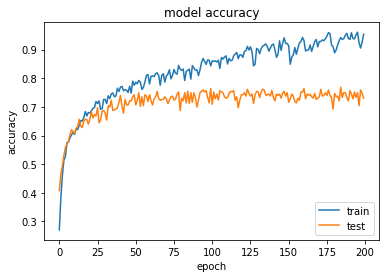

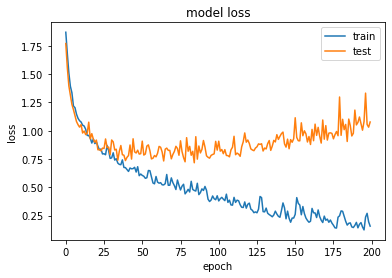

In [322]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


<div dir=rtl>
پس از ارزیابی شبکه ۴ معیار خواسته شده از آن بیرون کشیده شده و چاپ شده است
</div>

In [323]:
loss, acc , precision,recall,f1= model.evaluate(X_test, Y_test, verbose=0)

In [324]:
print('Test Accuracy: %.3f' % acc)
print('Test Precision: %.3f' % precision)
print('Test Recall: %.3f' % recall)
print('Test loss: %.3f' % loss)
print('Test F1: %.3f' % f1)

Test Accuracy: 0.771
Test Precision: 0.649
Test Recall: 0.713
Test loss: 0.889
Test F1: 0.679


<div dir=rtl>
کد مربوط به تکلیف به پایان رسید
<br>
در قسمت پایین کد های مربوط به قسمت ه است که توضیح آن پایین تر و در سلول مربوطه داده شده است
</div>

In [253]:
sample1=X_train[12:13]
sample2 = X_train[20:21]
sample3 = X_train[26:27]


yhat1 = model.predict(sample1)
print(np.around(yhat1 , decimals = 3))
yhat2 = model.predict(sample2)
print(np.around(yhat2 , decimals = 3))
yhat3 = model.predict(sample3)
print(np.around(yhat3 , decimals = 3))


[[0.363 0.218 0.025 0.    0.223 0.004 0.167]]
[[0.141 0.131 0.039 0.134 0.015 0.085 0.454]]
[[0.377 0.001 0.077 0.    0.043 0.206 0.296]]


In [254]:

)


model = Sequential()
model.add(Flatten(input_shape=(48,48)))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(7))
model.add(Activation('softmax'))


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=categorical_crossentropy,
    metrics=['accuracy', km.categorical_precision(), km.categorical_recall(),km.categorical_f1_score()],
)
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=70,
          verbose=2,
          validation_data=(X_valid, Y_valid))



Epoch 1/70


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1402: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


27/27 - 2s - loss: 1.8731 - accuracy: 0.2771 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.8093 - val_accuracy: 0.2816 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/70
27/27 - 1s - loss: 1.6901 - accuracy: 0.3678 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.5344 - val_accuracy: 0.4224 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/70
27/27 - 1s - loss: 1.4908 - accuracy: 0.4529 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.3463 - val_accuracy: 0.5298 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/70
27/27 - 1s - loss: 1.3811 - accuracy: 0.5104 - precision: 0.6667 - recall: 0.0035 - f1_score: 0.0070 - val_loss: 1.3766 - val_accuracy: 0.4869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 5/70
27/27 - 1s - loss: 1.2828 - 

In [255]:
yhat1 = model.predict(sample1)
print(np.around(yhat1 , decimals = 3))

yhat2 = model.predict(sample2)
print(np.around(yhat2 , decimals = 3))

yhat3 = model.predict(sample3)
print(np.around(yhat3 , decimals = 3))


[[0.032 0.728 0.008 0.    0.231 0.    0.   ]]
[[0.063 0.48  0.132 0.06  0.003 0.194 0.066]]
[[0.781 0.001 0.037 0.    0.08  0.002 0.099]]


<div dir=rtl>
قسمت الف :
<br>
در این شبکه از سه لایه پنهان با به ترتیب ۱۰۰ و ۷۰ و ۵۰ نرون استفاده شده است
<br>
دقت شبکه در آخرین اچرایی که بنده از آن گرفتم 0.764 بود . اما این مقدار در نوسان است و در کمترین حالتی که بنده از آن مشاهده کردم در بهترین حالتی که بنده از آن مشاهده کردم به ۷۸٫۴ و کمترین حالت نیز ۷۲ می رسد
<br>
این شبکه دارای بیش برازش است. سعی شده است تا آنجا که ممکن است از این موضوع جلوگیری شود. برای از بین بردن بیش برازش می توان شبکه را کمی سبک کرد. به عنوان مثال نرون های لایه های پنهان را کاهش داد و یا لایه ها را کمتر کرد.
همچنین یکی از راه های از بین بردن بیش برازش استفاده از dropout است.
<br>
دقت برای داده های آموزش و ارزیابی به ترتیب 0.8100 و 0.77 است.
<br>
این مقدار میتوانست بیشتر باشد اما برای جلوگیری از بیش برازش بیشتر شبکه را بزرگ تر نکردم
</div>

<div dir=rtl>
<br>

<br>
<br>

قسمت ب :
<br>
۵ مقدار برای نرخ یادگیری تست شده است که به شرح زیر است :
<br>
learning rate = 0.001 ====> accuracy = 0.765
<br>
learning rate = 0.008 ====> accuracy = 0.712
<br>
learning rate = 0.01 ====> accuracy = 0.701
<br>
learning rate = 0.2 ====> accuracy = 0.317
<br>
learning rate = 1 ====> accuracy = 0.317
<br>
نرخ یادگیری تعیین میکند که در نزول گرادیانی ، شبکه با چه سرعتی پیش رود.
<br>
اگر نرخ یادگیری را کم بگیریم برای رسیدن به دقت مناسب نیاز به ایپاک های بیشتری داریم و در مقابل اگر نرخ یادگیری را زیاد بگیریم در ایپاک های کمتری به همگرایی می رسیم
<br>
نرخ یادگیری بزرگ باعث می شود که به سرعت به یک راه حل غیر بهینه برسیم و در مقابل نیز اگر نرخ یادگیری خیلی خیلی کوچک باشد باشد این 
احتمال وجود دارد که در بهینه محلی گیر کند
<br>
<br>
<br>
<br>
<br>

در این قسمت ۵ مقدار مختلف برای minibach را تست میکنیم که حاصل آن به صورت زیر است :
<br>
batch size = 8 =========> Accuracy: 0.740
<br>
batch size = 64 ========> Accuracy: 0.727
<br>
batch size = 128 =======> Accuracy: 0.756
<br>
batch size = 256 =======> Accuracy: 0.738
<br>
batch size = 512 =======> Accuracy: 0.722
<br>
batch size = 1000 ======> Accuracy: 0.678

<br>
batch size در واقع تعداد ورودی هاییست که به شبکه داده می شود تا در هر تکرار بر روی آن ها کار کند.
<br>
هر چه انداره batch را بیشتر کنیم سرعت اجرا بیشتر خواهد شد
<br>

انتخاب بهترین اندازه برای batch  راه حل دقیقی ندارد و این کار با توجه به حجم داده ها و گرافیک سیستم با آزمون و خطا تعیین می شود
<br>

</div>

<div 



<div dir=rtl>
قسمت ج :
<br>
در این قسمت ۳ مقدار مختلف برای لایه ها و شبکه تست می شود که به صورت زیر است :
<br>
۱) اگر شبکه را با سه لایه پنهان و تعداد نورون های به ترتیب ۱۰۰ و ۷۰ و ۵۰ تعیین کنیم دقت حاصل برابر با ۰٫۷۶۱ می شود
<br>
۲) اگر شبکه را با ۱ لایه پنهان و با 20 نرون پیاده سازی کنیم مقدار  دقت برابر     می شود با 0.59
<br>
اگر شبکه را با ۵ لایه و تعداد نرون های ۵۰۰ و ۴۰۰ و ۳۰۰ و ۲۰۰ و ۱۰۰ 
طراحی کنیم دقت برابر ۰٫۷۱ خواهد شد اما بیش برازش رخ خواهد داد
<br>
نتیجه ای که گرفته می شود این است که اگر شبکه را خیلی کوچک بگیریم نمیتوانیم به دقت دلخواه برسیم و underfit رخ می دهد و شبکه به خوبی آموزش نمی بیند.
<br>
در ظرف مقابل نیز اگر شبکه را بیش از حد بزرگ کنیم باز هم شبکه حاصل خوبی نخواهد داشت و overfit رخ خواهد داد 
</div>

<div dir=rtl>
<br>

قسمت د :
<br>

در این بخش الگوریتم های مختلف بهینه سازی را تست میکنیم :
<br>
ADAM : Accuracy: 0.756
<br>
SGD  : Accuracy: 0.525
<br>
RMSPROP : Accuracy: 0.579
<br>
ADAgrad : Accuracy: 0.629
<br>
به طور کلی بهینه ساز ادام عملکرد بهتری دارد
<br>
هر سه روش  adamو  adagrad وrmsprob  به این صورت کار میکند که که از یک نرخ یادگیری به ازای هر پارامتر برای یادگیری استفاده می کنند که این نرخ یادگیری به وسیله متوسط مقادیر بدست آمده گرادیان های بدست آمده بدست می آید.
<br>
نکته دیگری که وجود دارد این است که نوسان موجود در روش SGD بیشتر از سایر روش هاست و ادام با نوسان کمتری جلو می رود

</div>

<div dir=rtl>
قسمت ه :
<br>
در این قسمت به وسیله model.predict احتمال هر عکس را برای هر کدام از ۷ حالت بیرون می کشیم.
<br>
پس از بررسی چندین تصویر سه تصویر انتخاب شده تصاویر ۱۲ و ۲۰ و ۲۶ بودند که قطعیت پاییینی داشتند.
<br>
احتمالات آن ها به ترتیب به صورت زیر است :
<br>

[[0.363 0.218 0.025 0.    0.223 0.004 0.167]]
<br>

[[0.141 0.131 0.039 0.134 0.015 0.085 0.454]]
<br>

[[0.377 0.001 0.077 0.    0.043 0.206 0.296]]
<br>
برای اینکه این سه تصویر نیز با قطعیت بالایی دسته بندی شوند لایه ها و نرون ها را بیشتر میکنیم تا روی داده های آموزش عملکرد بهتری پیدا کنند.
<br>
پس از اینکه این کار انجام شد حاصل احتالات تصاویر به صورت زیر در خواهد آمد :
<br>
[[0.032 0.728 0.008 0.    0.231 0.    0.   ]]
[[0.063 0.48  0.132 0.06  0.003 0.194 0.066]]
[[0.781 0.001 0.037 0.    0.08  0.002 0.099]]

<br>
همانطور که مشخص است قطعیت این تصویر تا حد خوبی بهبود یافته است

</div>